In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [2]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images,test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


In [3]:
text_labels = []
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
for i in np.arange(np.size(train_labels)):
  a = train_labels[i]
  text_labels.append(labels[int(a)])

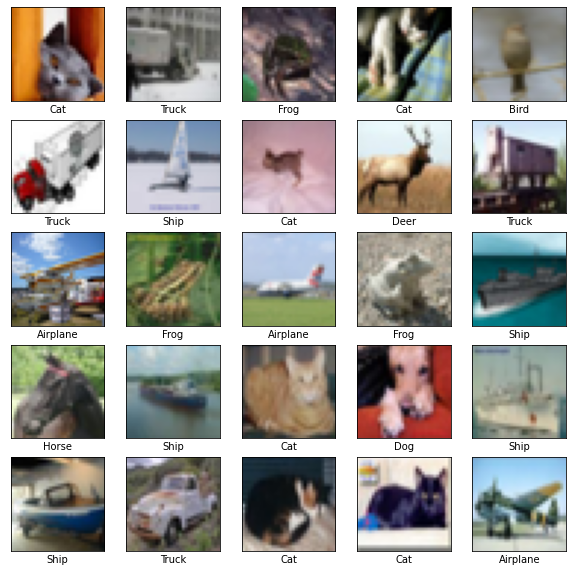

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(text_labels[img_index])

In [5]:
#normalizo datos
media = np.mean(train_images, axis =0)
desvio = np.std(train_images, axis = 0)
train_images = (train_images-media)/desvio

test_images = (test_images-media)/desvio

In [6]:
#creo modelo
capas_ocultas = np.array([128, 64, 32, 16])
num_epochs = 1000
numero_muestras =train_labels.shape[0]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(capas_ocultas[0],activation='relu', kernel_initializer='HeNormal'))
model.add(tf.keras.layers.Dense(capas_ocultas[1], activation='relu',kernel_initializer='glorot_normal', input_dim=capas_ocultas[0]))
model.add(tf.keras.layers.Dense(capas_ocultas[2], activation='relu',kernel_initializer='he_normal',input_dim=capas_ocultas[1]))
model.add(tf.keras.layers.Dense(capas_ocultas[3], activation='relu',kernel_initializer='he_normal',input_dim=capas_ocultas[2]))
model.add(tf.keras.layers.Dense(10,activation = 'softmax' ,input_dim= capas_ocultas[3]))
model.summary()

es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True) 
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = 'accuracy')
hist = model.fit(x=train_images, y=train_labels, batch_size = numero_muestras, epochs=num_epochs, callbacks = [es],validation_data=(test_images,test_labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 404,378
Trainable params: 404,378
Non-trai

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 4s 4s/step - loss: 2.8053 - accuracy: 0.0914 - val_loss: 2.7052 - val_accuracy: 0.1172
Epoch 2/1000
1/1 [==============================] - 0s 351ms/step - loss: 2.7070 - accuracy: 0.1154 - val_loss: 2.4516 - val_accuracy: 0.1514
Epoch 3/1000
1/1 [==============================] - 0s 465ms/step - loss: 2.4682 - accuracy: 0.1505 - val_loss: 2.3006 - val_accuracy: 0.1712
Epoch 4/1000
1/1 [==============================] - 0s 355ms/step - loss: 2.3037 - accuracy: 0.1651 - val_loss: 2.2625 - val_accuracy: 0.1825
Epoch 5/1000
1/1 [==============================] - 0s 377ms/step - loss: 2.2592 - accuracy: 0.1787 - val_loss: 2.2339 - val_accuracy: 0.1783
Epoch 6/1000
1/1 [==============================] - 0s 354ms/step - loss: 2.2313 - accuracy: 0.1771 - val_loss: 2.1939 - val_accuracy: 0.1737
Epoch 7/1000
1/1 [==============================] - 0s 359ms/step - loss: 2.1937 - accuracy: 0.1771 - val_loss: 2.1664 - val_accuracy: 0.1774
Epoch 8/1000
1/1 [====

In [7]:
#ver como obtener el val_accuracy que le corresponde a los mejores pesos
ac_val = np.max(hist.history['val_accuracy'])
print("Accuracy de validacion:", ac_val)



Accuracy de validacion: 0.4666999876499176


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.56      0.53      0.54      1000
           1       0.56      0.57      0.57      1000
           2       0.38      0.30      0.34      1000
           3       0.31      0.34      0.33      1000
           4       0.39      0.34      0.36      1000
           5       0.38      0.39      0.38      1000
           6       0.46      0.56      0.51      1000
           7       0.51      0.51      0.51      1000
           8       0.58      0.62      0.60      1000
           9       0.51      0.51      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



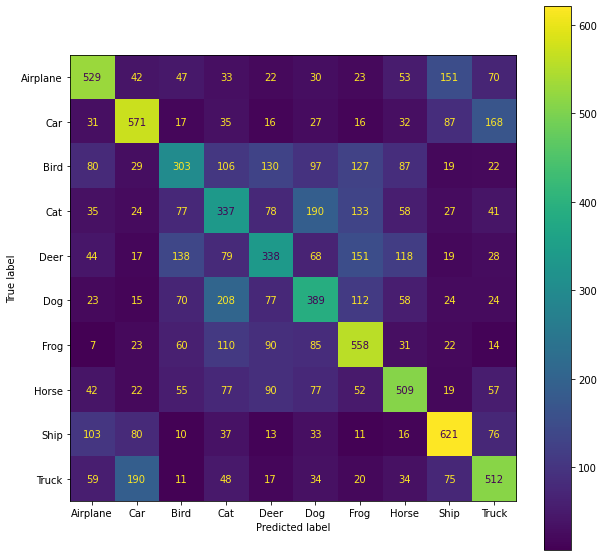

In [8]:
#veo como se comporta mi modelo mediante una confussion matrix

valores_estimados = model.predict(test_images)
largo = np.shape(valores_estimados)[0]
resultados_estimados = []
for i in np.arange(largo):
  resultados_estimados.append(np.argmax(valores_estimados[i]))
def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))

show_results(test_labels,resultados_estimados)